All required columns are present.
         Date      Open      High       Low     Close  Adj Close      Volume  \
0  1997-05-15  0.121875  0.125000  0.096354  0.097917   0.097917  1443120000   
1  1997-05-16  0.098438  0.098958  0.085417  0.086458   0.086458   294000000   
2  1997-05-19  0.088021  0.088542  0.081250  0.085417   0.085417   122136000   
3  1997-05-20  0.086458  0.087500  0.081771  0.081771   0.081771   109344000   
4  1997-05-21  0.081771  0.082292  0.068750  0.071354   0.071354   377064000   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  
All required columns are present.
         Date      Open      High       Low     Close  Adj Close      Volume  \
0  1997-05-15  0.121875  0.125000  0.096354  0.097917   0.097917  1443120000   
1  1997-05-16  0.098438  0.098958  0.085417  0.086458   0.086458   294000000   
2  1997-05-19  0.088021  0.088542  0.

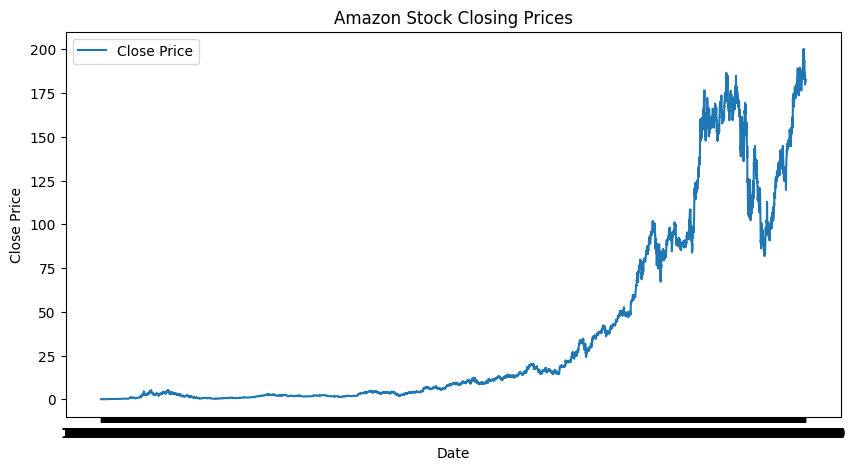

In [4]:
# In your Jupyter Notebook

# Import necessary modules 
import sys 
import os 
# Add the parent directory to the Python path 
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))
# Import the load_and_verify_csv function
from scripts.load_file import load_and_verify_csv

# Load the CSV data into a DataFrame
file_path = '../../../AMZN_historical_data.csv'
df = load_and_verify_csv(file_path)

if df is not None:
    # Display the first few rows of the DataFrame
    print(df.head())

    # Calculate basic statistics
    stats = df.describe()
    print(stats)

    # Plot the closing prices over time
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 5))
    plt.plot(df['Date'], df['Close'], label='Close Price')
    plt.title('Amazon Stock Closing Prices')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()
else:
    print("Data not loaded due to missing required columns.")


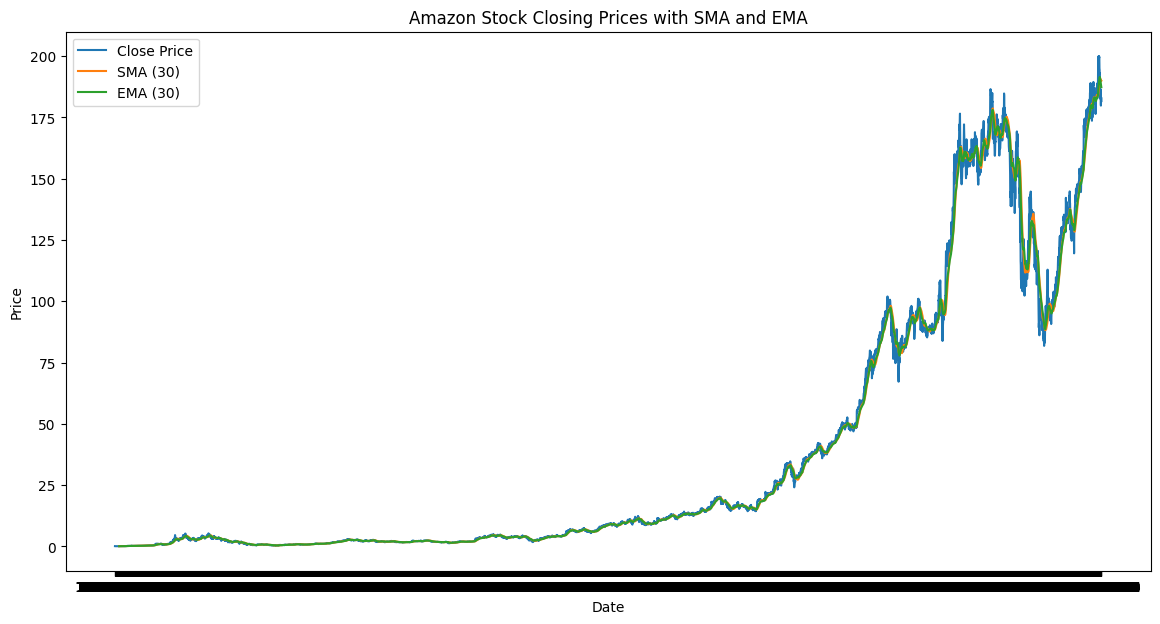

In [8]:
import talib# Calculate the Simple Moving Average (SMA) and Exponential Moving Average (EMA)
df['SMA'] = talib.SMA(df['Close'], timeperiod=30)
df['EMA'] = talib.EMA(df['Close'], timeperiod=30)

# Plot the closing prices and the moving averages
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['SMA'], label='SMA (30)')
plt.plot(df['Date'], df['EMA'], label='EMA (30)')
plt.title('Amazon Stock Closing Prices with SMA and EMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


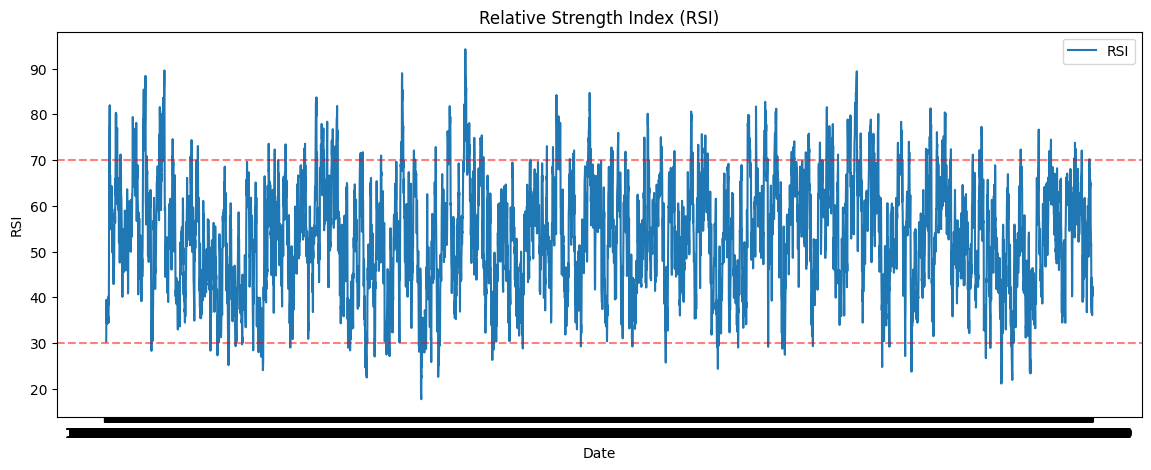

In [9]:
# Calculate the Relative Strength Index (RSI)
df['RSI'] = talib.RSI(df['Close'], timeperiod=14)

# Plot the RSI
plt.figure(figsize=(14, 5))
plt.plot(df['Date'], df['RSI'], label='RSI')
plt.axhline(30, linestyle='--', alpha=0.5, color='red')
plt.axhline(70, linestyle='--', alpha=0.5, color='red')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()


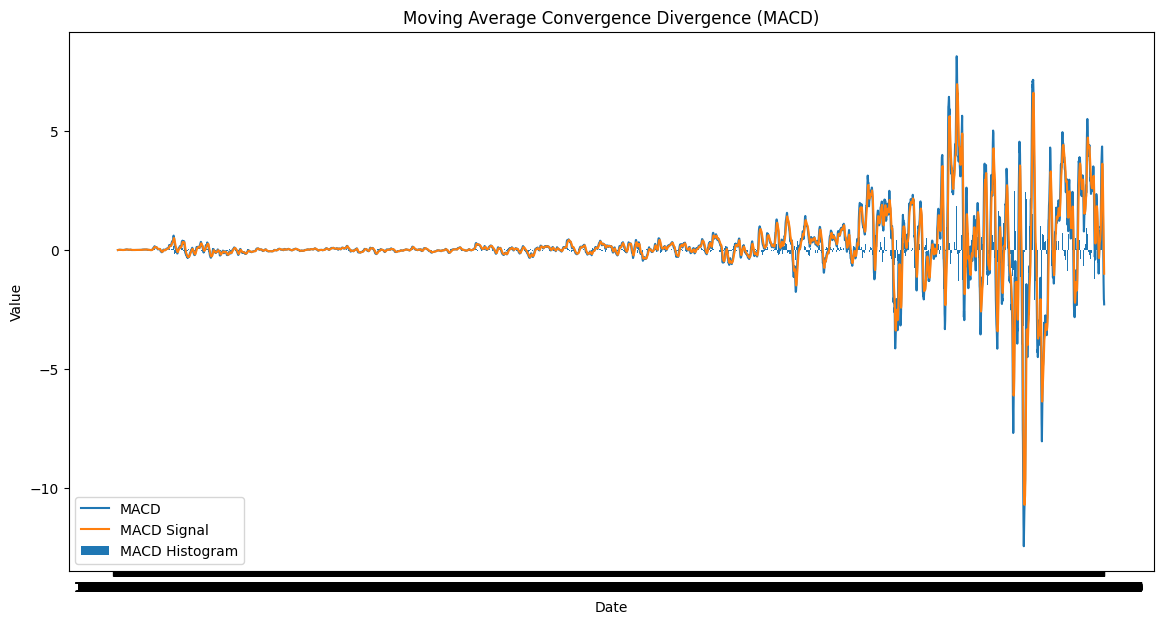

In [10]:
# Calculate the MACD
df['MACD'], df['MACD_Signal'], df['MACD_Hist'] = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Plot the MACD
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['MACD'], label='MACD')
plt.plot(df['Date'], df['MACD_Signal'], label='MACD Signal')
plt.bar(df['Date'], df['MACD_Hist'], label='MACD Histogram')
plt.title('Moving Average Convergence Divergence (MACD)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


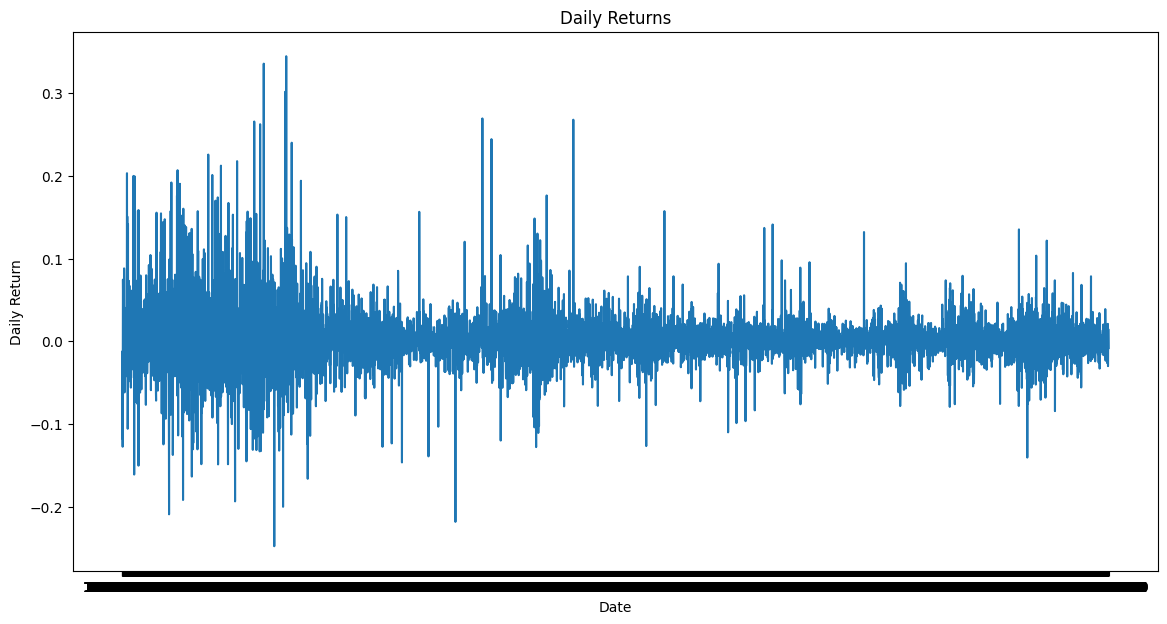

In [14]:
import pynance as pn
# Calculate daily returns
df['Daily Return'] = df['Close'].pct_change()

# Plot daily returns
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Daily Return'])
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.show()


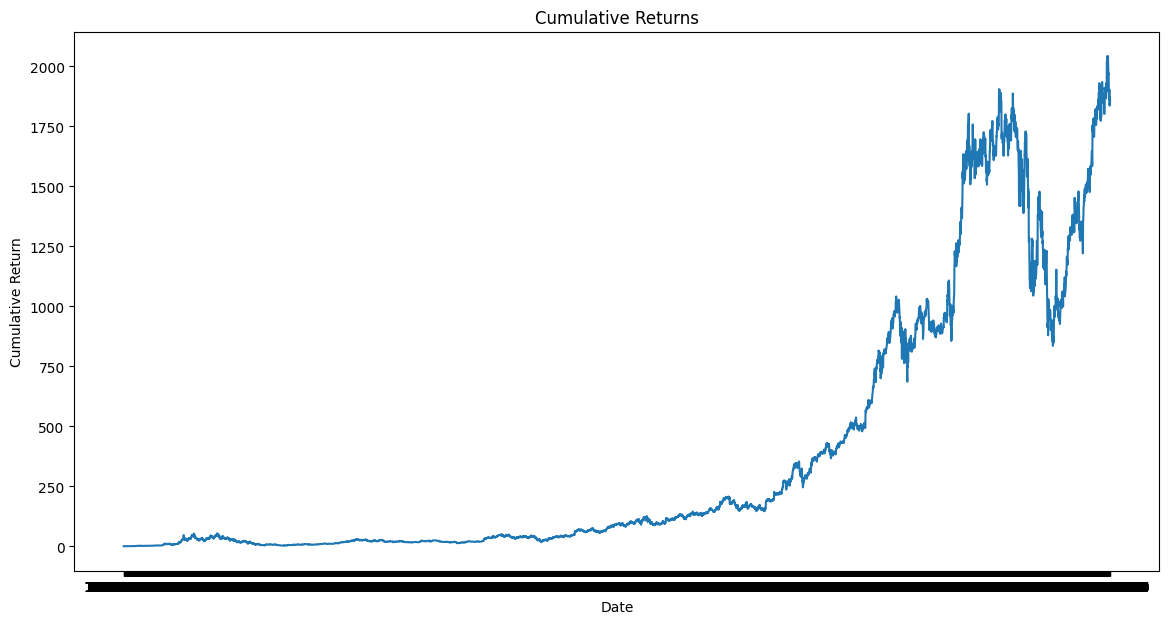

In [15]:
# Calculate cumulative returns
df['Cumulative Return'] = (1 + df['Daily Return']).cumprod()

# Plot cumulative returns
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Cumulative Return'])
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.show()


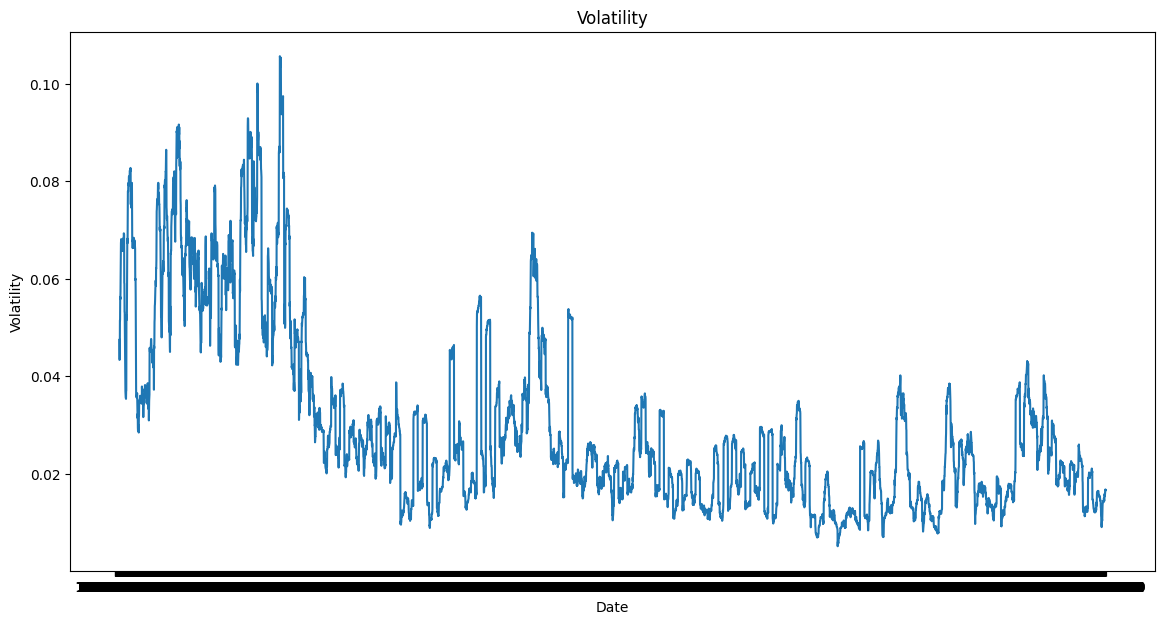

In [16]:
# Calculate volatility
df['Volatility'] = df['Daily Return'].rolling(window=30).std()

# Plot volatility
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Volatility'])
plt.title('Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()


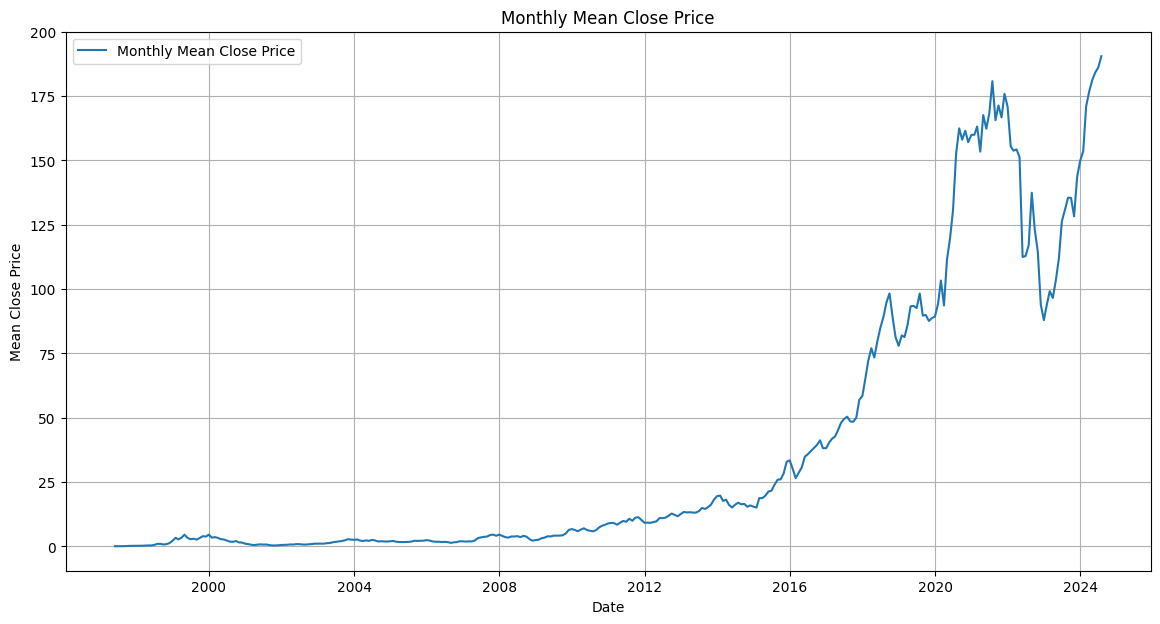

In [18]:
import pandas as pd
# Set Date as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Resample data to monthly frequency and calculate mean closing prices
monthly_means = df['Close'].resample('M').mean()

# Plot monthly means
plt.figure(figsize=(14, 7))
plt.plot(monthly_means, label='Monthly Mean Close Price')
plt.title('Monthly Mean Close Price')
plt.xlabel('Date')
plt.ylabel('Mean Close Price')
plt.legend()
plt.grid(True)
plt.show()
